<a href="https://colab.research.google.com/github/vbhaktha13/Neural-Networks/blob/main/Fake_News_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import nltk
from tkinter import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import scipy
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.python import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
tf.__version__

'2.8.2'

In [3]:
import os
print(os.getcwd())

/content


In [4]:
from zipfile import ZipFile

from google.colab import drive

In [5]:
import zipfile
with zipfile.ZipFile("data (5).zip","r") as zip_ref:
    zip_ref.extractall("fake_newsdir")

In [6]:
fake_train=pd.read_csv('/content/fake_newsdir/data/news_train.csv')

In [7]:
fake_test=pd.read_csv('/content/fake_newsdir/data/news_test.csv')

In [8]:
fake_train.head(2)


,Id,title,text,subject,date,Label
0,36335,Turkey's Erdogan says U.S. Jerusalem decision ...,ATHENS (Reuters) - Turkish President Tayyip Er...,worldnews,"December 7, 2017",true
1,12384,BREAKING: Trump Reportedly Considering Ted Cru...,"Ted Cruz would be fair, honest and most of all...",politics,"Nov 15, 2016",fake


In [9]:
fake_test.head(2)

,Id,title,text,subject,date
0,22216,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017"
1,27917,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017"


In [10]:
fake_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35918 entries, 0 to 35917
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       35918 non-null  int64 
 1   title    35918 non-null  object
 2   text     35918 non-null  object
 3   subject  35918 non-null  object
 4   date     35918 non-null  object
 5   Label    35918 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [11]:
fake_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8980 non-null   int64 
 1   title    8980 non-null   object
 2   text     8980 non-null   object
 3   subject  8980 non-null   object
 4   date     8980 non-null   object
dtypes: int64(1), object(4)
memory usage: 350.9+ KB


No null values

In [12]:
fake_train.dropna()

,Id,title,text,subject,date,Label
0,36335,Turkey's Erdogan says U.S. Jerusalem decision ...,ATHENS (Reuters) - Turkish President Tayyip Er...,worldnews,"December 7, 2017",true
1,12384,BREAKING: Trump Reportedly Considering Ted Cru...,"Ted Cruz would be fair, honest and most of all...",politics,"Nov 15, 2016",fake
2,24419,Trump chief of staff's Civil War comment spark...,WASHINGTON (Reuters) - White House Chief of St...,politicsNews,"October 31, 2017",true
3,24740,Saudi Arabia welcomes new U.S. strategy toward...,DUBAI (Reuters) - Saudi Arabia welcomed the ne...,politicsNews,"October 13, 2017",true
4,27039,Trump arrives in Sicily ahead of Group of Seve...,"SIGONELLA, Italy (Reuters) - U.S. President Do...",politicsNews,"May 25, 2017",true
...,...,...,...,...,...,...
35913,11284,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",fake
35914,44732,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",true
35915,38158,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",true
35916,860,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",fake


In [13]:
fake_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35913    False
35914    False
35915    False
35916    False
35917    False
Length: 35918, dtype: bool

In [14]:
fake_train.describe()

,Id
count,35918.000000
mean,22470.460911
std,12941.199428
min,0.000000
25%,11256.500000
50%,22508.500000
75%,33647.750000
max,44897.000000


In [15]:
#mapping the labels

fake_train['Label'] = fake_train['Label'].map({'true':1,'fake':0})

In [16]:
fake_train.head(2)

,Id,title,text,subject,date,Label
0,36335,Turkey's Erdogan says U.S. Jerusalem decision ...,ATHENS (Reuters) - Turkish President Tayyip Er...,worldnews,"December 7, 2017",1
1,12384,BREAKING: Trump Reportedly Considering Ted Cru...,"Ted Cruz would be fair, honest and most of all...",politics,"Nov 15, 2016",0


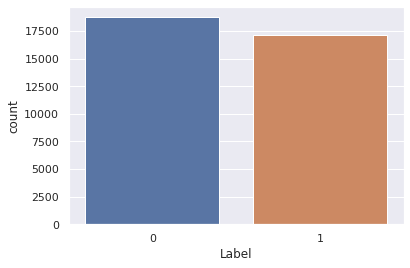

In [17]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Label", data=fake_train)

Labels are mapped for true/fake to 1,0

In [18]:
### Vocabulary size
voc_size=10000

In [19]:
fake_train.shape

(35918, 6)

In [20]:
fake_test.drop(['text','subject','date'],axis=1,inplace=True)

fake_test.head()

,Id,title
0,22216,Ben Stein Calls Out 9th Circuit Court: Committ...
1,27917,Trump drops Steve Bannon from National Securit...
2,25007,Puerto Rico expects U.S. to lift Jones Act shi...
3,1377,OOPS: Trump Just Accidentally Confirmed He Le...
4,32476,Donald Trump heads for Scotland to reopen a go...


In [21]:
fake_test.set_index('Id',inplace=True)


In [22]:
fake_train.set_index('Id',inplace=True)

In [23]:
fake_train.drop(['text','subject','date'],axis=1,inplace=True)

In [24]:
fake_train.head(2)

,title,Label
Id,,
36335,Turkey's Erdogan says U.S. Jerusalem decision ...,1
12384,BREAKING: Trump Reportedly Considering Ted Cru...,0


In [25]:
## Get the Independent Features

X=fake_train.drop('Label',axis=1)

In [26]:
## Get the Dependent features
y=fake_train['Label']

In [27]:
fake_test.shape

(8980, 1)

In [28]:
#fake_test.rename(columns = {'title':'Title'}, inplace = True)
  

In [29]:
fake_test.head()

,title
Id,
22216,Ben Stein Calls Out 9th Circuit Court: Committ...
27917,Trump drops Steve Bannon from National Securit...
25007,Puerto Rico expects U.S. to lift Jones Act shi...
1377,OOPS: Trump Just Accidentally Confirmed He Le...
32476,Donald Trump heads for Scotland to reopen a go...


In [30]:
X.shape

(35918, 1)

In [31]:
y.shape

(35918,)

In [32]:
news=X.copy()

In [33]:
#news.reset_index(inplace=True)

In [34]:
news['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [35]:
news1=fake_test.copy()

In [36]:
print(news1)

                                                   title
Id                                                      
22216  Ben Stein Calls Out 9th Circuit Court: Committ...
27917  Trump drops Steve Bannon from National Securit...
25007  Puerto Rico expects U.S. to lift Jones Act shi...
1377    OOPS: Trump Just Accidentally Confirmed He Le...
32476  Donald Trump heads for Scotland to reopen a go...
...                                                  ...
42119  Saudi authorities pursue Twitter user over wom...
4068    Unearthed 2012 Trump Interview Shows A COMPLE...
22498  CONFUSED.GOV: Obama’s Imperial Mideast Policy ...
14658  IRAN Announces Reason For Arresting US Sailors...
15236  (VIDEO) YOU’LL BE SHOCKED AT HOW LITTLE PEOPLE...

[8980 rows x 1 columns]


In [37]:
#import copy

In [38]:
# create a deep copy
#news_2 = copy.deepcopy(fake_test)

In [39]:
#news_2

In [40]:
news1.head(2)

,title
Id,
22216,Ben Stein Calls Out 9th Circuit Court: Committ...
27917,Trump drops Steve Bannon from National Securit...


In [41]:
import nltk
import re
from nltk.corpus import stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', news.iloc[i, 0])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
3

In [44]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus1 = []
for j in range(0, len(news1)):
    print(j)
    review1 = re.sub('[^a-zA-Z]', ' ', news1.iloc[j, 0])
    review1 = review1.lower()
    review1 = review1.split()
    
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    corpus1.append(review1)

Streaming output truncated to the last 5000 lines.
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169

In [45]:
onehot_representation=[one_hot(words,voc_size)for words in corpus] 
onehot_representation

[[6821, 6350, 2335, 6021, 2778, 663, 3740, 3301],
 [7449, 5040, 202, 2468, 617, 347, 4128, 5152, 8434],
 [5040, 142, 5225, 1830, 535, 2048, 8000, 6204],
 [7554, 6189, 3867, 2093, 6021, 560, 97, 628],
 [5040, 1693, 9636, 3979, 5277, 6645, 2289],
 [5104, 2107, 142, 8791, 8492, 128, 2984, 1100, 1232],
 [9846, 2335, 9075, 5292, 543, 7952, 4191, 125],
 [7449, 5040, 4128, 7095, 1450, 3928, 816, 6092, 5941, 1551],
 [2762, 5040, 9669, 4195, 2916, 7287, 1333, 6719],
 [2527, 3142, 1155, 2841, 2996, 1507, 7920, 6557, 7478, 3596],
 [753, 850, 7439, 7009, 918, 750, 9291, 9230, 9629, 2582],
 [7449,
  3285,
  9551,
  6184,
  125,
  9837,
  9846,
  6696,
  4644,
  5771,
  4432,
  9514,
  5853,
  3115,
  6311,
  7731,
  711,
  2491],
 [9825, 4842, 670, 5196, 1304, 5202, 7494, 2842, 1188],
 [8738, 5394, 8675, 2335, 8106, 6523, 6534, 6517],
 [5040, 9549, 4682, 2367, 7621, 4837, 8052],
 [5040, 8310, 7835, 586, 4720, 1450, 3928, 481],
 [3165, 7014, 7317, 8395, 1201, 5040, 2133, 7525],
 [6584, 6184, 125, 69

In [46]:
corpus1

['ben stein call th circuit court commit coup tat constitut',
 'trump drop steve bannon nation secur council',
 'puerto rico expect u lift jone act ship restrict',
 'oop trump accident confirm leak isra intellig russia video',
 'donald trump head scotland reopen golf resort',
 'paul ryan respond dem sit gun control disgust way video',
 'awesom diamond silk rip press believ video',
 'stand cheer ukip parti leader slam germani franc eu invas phoni refuge video',
 'north korea show sign seriou talk u offici',
 'trump signal willing rais u minimum wage',
 'new jersey christi mull run lead republican parti report',
 'hillari clinton spot dine alon',
 'franc germani want iran revers ballist missil program',
 'aid eu commiss head tweet pictur white smoke brexit meet may',
 'trump issu warn man armi could isi video',
 'u give lao extra million help clear unexplod ordnanc',
 'judg declar babi name illeg prevent emot harm',
 'paul ryan take monument humili photo constitu expertli troll imag',
 '

In [47]:
corpus

['turkey erdogan say u jerusalem decis trampl law',
 'break trump reportedli consid ted cruz top cabinet posit',
 'trump chief staff civil war comment spark critic',
 'saudi arabia welcom new u strategi toward iran',
 'trump arriv sicili ahead group seven summit',
 'act dh chief deni white hous pressur immigr program',
 'obama say left right wrong wall street rule',
 'break trump top pick secretari state announc horrifi world detail',
 'eric trump said someth monument stupid twitter roast',
 'review convict felon dinesh souza anti hillari film hilari screenshot',
 'german polic secur nail fill packag found near christma market',
 'break us suprem court rule king obama overstep author execut amnesti million illeg alien democrat voter go happen',
 'christian lawyer threaten transgend women gun violenc use bathroom',
 'south africa zuma say influenc peddl govern investig',
 'trump invit uk may visit soon possibl',
 'trump like name exxon ceo secretari state sourc',
 'watch colbert devis p

In [48]:
onehot_representation1=[one_hot(words,voc_size)for words in corpus1] 
onehot_representation1

[[787, 2198, 1823, 6257, 5896, 6184, 9523, 5184, 695, 7729],
 [5040, 1663, 2673, 1196, 3518, 7439, 7845],
 [8248, 6521, 54, 6021, 4617, 6637, 5104, 4611, 3579],
 [6246, 5040, 4457, 1033, 9064, 7507, 367, 7687, 6622],
 [4339, 5040, 9628, 4942, 3382, 3944, 9482],
 [6470, 4288, 2627, 8762, 8590, 5202, 5767, 7656, 3156, 6622],
 [3904, 3221, 925, 908, 4751, 4969, 6622],
 [9605,
  6991,
  6771,
  8798,
  7784,
  6366,
  7050,
  8304,
  6288,
  7050,
  1850,
  7863,
  6622],
 [6152, 6877, 8675, 1245, 2832, 806, 6021, 5494],
 [5040, 6942, 6753, 2250, 6021, 7849, 2136],
 [2093, 8843, 7196, 5138, 2486, 8349, 8597, 8798, 9956],
 [7920, 1297, 4323, 6525, 6349],
 [8304, 7050, 2851, 628, 6544, 5170, 340, 1232],
 [584, 6288, 6397, 9628, 6825, 4958, 8492, 7660, 1646, 8180, 2367],
 [5040, 5461, 5155, 4342, 6178, 7820, 1053, 6622],
 [6021, 5767, 6471, 9527, 9514, 7770, 6237, 9910, 2150],
 [5501, 2854, 5136, 7835, 5853, 1141, 8677, 2166],
 [6470, 4288, 251, 2916, 2794, 4668, 3934, 3334, 4105, 5480],
 [85

In [49]:
# creating another feature called text_length as this could be important in finding whether news is fake
def text_length(x):
    return len(x.split())
fake_train['text_length'] = fake_train['title'].map(text_length)
fake_test['text_length']=fake_test['title'].map(text_length)
fake_test.head()

,title,text_length
Id,,
22216,Ben Stein Calls Out 9th Circuit Court: Committ...,14
27917,Trump drops Steve Bannon from National Securit...,8
25007,Puerto Rico expects U.S. to lift Jones Act shi...,10
1377,OOPS: Trump Just Accidentally Confirmed He Le...,12
32476,Donald Trump heads for Scotland to reopen a go...,10


In [50]:
#true news
true_text = list()
for line in fake_train[fake_train['Label']==0]['title']:
    true_text.extend(line.split())

#fake news
fake_text = list()
for line in fake_train[fake_train['Label']==1]['title']:
    fake_text.extend(line.split())

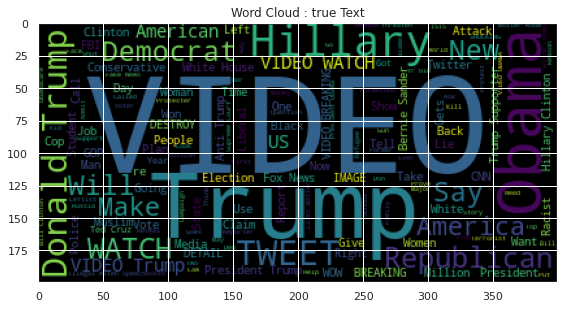

In [51]:
from wordcloud import WordCloud
true_wc = WordCloud().generate(' '.join(true_text))

#plotting figure
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(true_wc) 
plt.title('Word Cloud : true Text')
plt.tight_layout()

plt.show() 

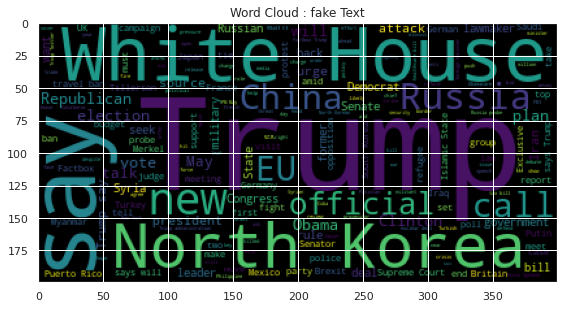

In [52]:
from wordcloud import WordCloud
fake_wc = WordCloud().generate(' '.join(fake_text))

#plotting figure
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(fake_wc) 
plt.title('Word Cloud : fake Text')
plt.tight_layout()

plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

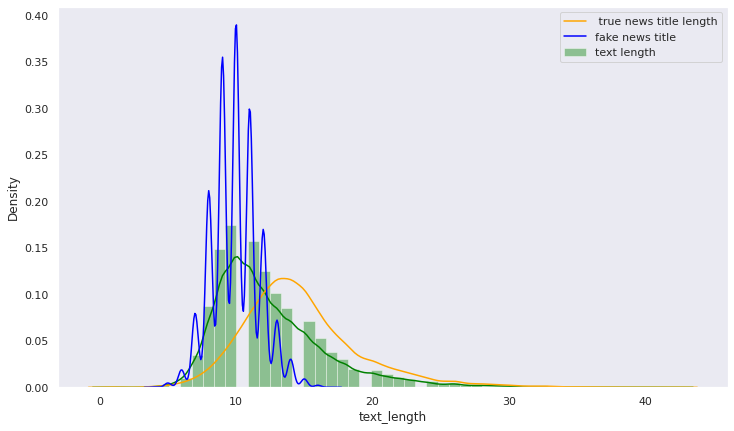

In [53]:
#checking distribution of text_length

plt.figure(figsize=(12, 7))
sns.distplot(fake_train['text_length'], hist=True, label='text length', color='Green')
sns.distplot(fake_train[fake_train['Label']==0]['text_length'], hist=False, label=' true news title length', color='orange')
sns.distplot(fake_train[fake_train['Label']==1]['text_length'], hist=False, label='fake news title', color='blue')
plt.grid()
plt.legend()
plt.show()

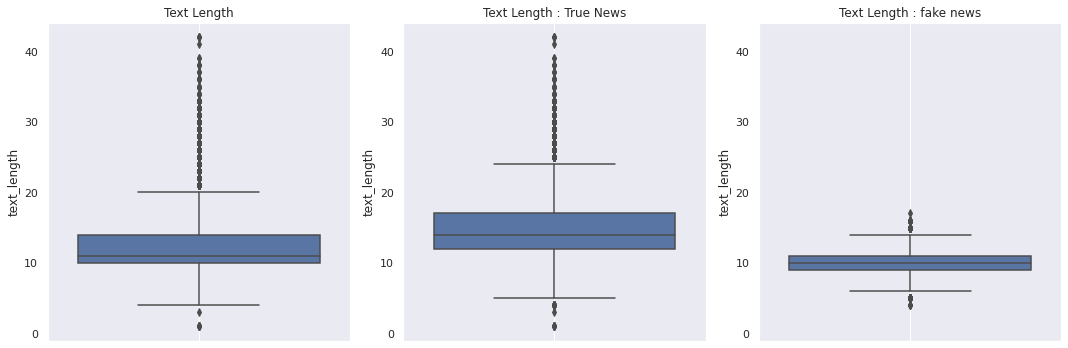

In [54]:
#plotting the box plot
plt.figure(figsize=(15, 5))

ax1=plt.subplot(131)
sns.boxplot(y=fake_train['text_length'], ax=ax1)
ax1.set_title('Text Length')
ax1.grid()

ax2=plt.subplot(132, sharey=ax1)
sns.boxplot(y=fake_train[fake_train['Label']==0]['text_length'], ax=ax2)
ax2.set_title('Text Length : True News')
ax2.grid()

ax3=plt.subplot(133, sharey=ax2)
sns.boxplot(y=fake_train[fake_train['Label']==1]['text_length'], ax=ax3)
ax3.set_title('Text Length : fake news')
ax3.grid()

plt.tight_layout()
plt.show()

In [55]:
fake_train.text_length.mean()

12.447463667242051

In [56]:
fake_test.text_length.mean()

12.47750556792873

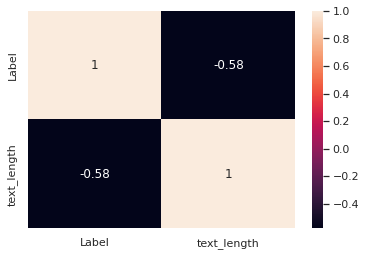

In [57]:
# Create a heatmap 
corr = fake_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [58]:
text_length=25
embedded_docs=pad_sequences(onehot_representation,padding='pre',maxlen=text_length)
print(embedded_docs)

[[   0    0    0 ...  663 3740 3301]
 [   0    0    0 ... 4128 5152 8434]
 [   0    0    0 ... 2048 8000 6204]
 ...
 [   0    0    0 ...  806 5494 5749]
 [   0    0    0 ... 7287 7952 1551]
 [   0    0    0 ... 6601 8054 4741]]


In [59]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 6821, 6350, 2335, 6021, 2778,
        663, 3740, 3301], dtype=int32)

In [60]:
text_length=25
embedded_docs1=pad_sequences(onehot_representation1,padding='pre',maxlen=text_length)
print(embedded_docs1)

[[   0    0    0 ... 5184  695 7729]
 [   0    0    0 ... 3518 7439 7845]
 [   0    0    0 ... 5104 4611 3579]
 ...
 [   0    0    0 ... 2358 4999 6094]
 [   0    0    0 ... 9453 3661 5825]
 [   0    0    0 ... 4138  628 5749]]


In [61]:
embedded_docs1[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  787, 2198, 1823, 6257, 5896, 6184, 9523,
       5184,  695, 7729], dtype=int32)

In [62]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=text_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
len(embedded_docs),y.shape

(35918, (35918,))

In [64]:
len(embedded_docs1)

8980

In [65]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)
fake_test_final=np.array(embedded_docs1)

In [66]:
X_final.shape

(35918, 25)

In [67]:
y_final.shape

(35918,)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [69]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
377/377 [==============================] - 20s 47ms/step - loss: 0.2450 - accuracy: 0.8944 - val_loss: 0.1429 - val_accuracy: 0.9422
Epoch 2/10
377/377 [==============================] - 19s 49ms/step - loss: 0.1026 - accuracy: 0.9609 - val_loss: 0.1368 - val_accuracy: 0.9456
Epoch 3/10
377/377 [==============================] - 17s 45ms/step - loss: 0.0661 - accuracy: 0.9747 - val_loss: 0.1495 - val_accuracy: 0.9431
Epoch 4/10
377/377 [==============================] - 17s 45ms/step - loss: 0.0445 - accuracy: 0.9850 - val_loss: 0.1835 - val_accuracy: 0.9428
Epoch 5/10
377/377 [==============================] - 17s 45ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.2147 - val_accuracy: 0.9423
Epoch 6/10
377/377 [==============================] - 17s 46ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.2356 - val_accuracy: 0.9417
Epoch 7/10
377/377 [==============================] - 17s 45ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.2450 - val_accuracy:

In [70]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=text_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
377/377 [==============================] - 27s 58ms/step - loss: 0.2594 - accuracy: 0.8831 - val_loss: 0.1502 - val_accuracy: 0.9383
Epoch 2/10
377/377 [==============================] - 17s 46ms/step - loss: 0.1223 - accuracy: 0.9531 - val_loss: 0.1416 - val_accuracy: 0.9441
Epoch 3/10
377/377 [==============================] - 17s 46ms/step - loss: 0.0866 - accuracy: 0.9678 - val_loss: 0.1466 - val_accuracy: 0.9421
Epoch 4/10
377/377 [==============================] - 17s 46ms/step - loss: 0.0648 - accuracy: 0.9763 - val_loss: 0.1622 - val_accuracy: 0.9447
Epoch 5/10
377/377 [==============================] - 17s 46ms/step - loss: 0.0495 - accuracy: 0.9828 - val_loss: 0.1631 - val_accuracy: 0.9427
Epoch 6/10
377/377 [==============================] - 18s 47ms/step - loss: 0.0410 - accuracy: 0.9853 - val_loss: 0.1931 - val_accuracy: 0.9431
Epoch 7/10
377/377 [==============================] - 17s 46ms/step - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.2087 - val_accuracy:

In [72]:
y_pred=model.predict(X_test)

In [73]:
y_pred

array([[2.1914497e-07],
       [5.5086111e-05],
       [9.6118242e-09],
       ...,
       [9.9710703e-01],
       [1.9368038e-08],
       [9.9998534e-01]], dtype=float32)

In [74]:
y_pred=np.where(y_pred >0.5, 1,0)

In [75]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [76]:
confusion_matrix(y_test,y_pred)

array([[5793,  346],
       [ 369, 5345]])

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9396777187209989

In [78]:
fake_test_final=np.array(embedded_docs1)

In [79]:
y_fake_pred=model.predict(fake_test_final)


In [80]:
y_pred_unknown=np.where(y_fake_pred >0.5, 1,0)
#y_pred_unknown=np.where(y_fake_pred >0.7, 1,0)

In [81]:
#y_pred_unknown=np.argmax(y_fake_pred)


In [82]:
y_pred_unknown=y_pred_unknown.reshape(-1)

In [83]:
y_pred_unknown.shape

(8980,)

In [84]:
y_pred_unknown

array([0, 0, 1, ..., 0, 0, 0])

In [85]:
y_pred_unknown.shape

(8980,)

In [86]:
# convert numpy array to dataframe
fake_unknown = pd.DataFrame(data = y_pred_unknown, 
                  columns =["Label"])
  

In [87]:
fake_unknown.shape


(8980, 1)

In [88]:
fake_test.head(2)

,title,text_length
Id,,
22216,Ben Stein Calls Out 9th Circuit Court: Committ...,14
27917,Trump drops Steve Bannon from National Securit...,8


In [89]:
fake_test.drop(['title', 'text_length'],axis=1,inplace=True)
fake_test.head(2)

""
Id
22216
27917


In [90]:
fake_unknown.head(2)

,Label
0,0
1,0


In [91]:
fake_test.head(2)

""
Id
22216
27917


In [92]:
fake_unknown.head(2)

,Label
0,0
1,0


In [93]:
fake_test_predicted=pd.concat([fake_test, fake_unknown.set_index(fake_test.index)],axis=1)

In [94]:
fake_test_predicted.head()

,Label
Id,
22216,0
27917,0
25007,1
1377,0
32476,0


In [95]:
from sklearn import preprocessing
fake_test_predicted['Label'] = fake_test_predicted['Label'].map({1:'TRUE',0:'fake'})
#y_Insaid = encoder.inverse_transform(fake_test_predicted)

In [96]:
fake_test_predicted.head(2)

,Label
Id,
22216,fake
27917,fake
